<a href="https://colab.research.google.com/github/Sirabhop/Preclinical-AD-EEG-classification/blob/master/Machine_Learning_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Set working directory and import cookbook
os.chdir("/content/drive/My Drive/Colab Notebooks/")

#Download eeg feature extraction function
%run EEG_Feature_Extraction.ipynb

     |████████████████████████████████| 6.6MB 2.8MB/s 
  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-ul6nzx5t
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-ul6nzx5t
  Created wheel for entropy: filename=entropy-0.1.1-cp36-none-any.whl size=15459 sha256=bbfd51da6b69c6c4a9e7effe9232ace9079662a7c2bcf0c1a8a50a3d3da4ed70
  Stored in directory: /tmp/pip-ephem-wheel-cache-mrwlvvje/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy
  Cloning https://github.com/nice-tools/nice.git to /tmp/pip-req-build-kc26d88n
  Running command git clone -q https://github.com/nice-tools/nice.git /tmp/pip-req-build-kc26d88n
  Created wheel for nice: filename=nice-0.1.dev0-cp36-none-any.whl size=53945 sha256=6bf272f29b4153718ffd9051ad4db32b18a22f88bb6950008e527881e8e5ae79
  Stored in directory: /tmp/pip-ephem-wheel-cache-sygapu_e/wheels/50/a0/a3/2d473364ff7f9fdd3d41b0da4b4e34ef98c713cfa30695

# **Import Data**

In [0]:
os.chdir("/content/drive/My Drive/EEG Data")

In [0]:
#Compute EEG feature
subjectID = ['SS2', 'SS4', 'SS5', 'SS6', 'SS7', 'SS8']
df_IR = extract_feature(subjectID, 'IR')

df_DL = extract_feature(subjectID, 'DL')

df = pd.concat((df_IR,df_DL), axis = 1)

#Export EEG feature
df_IR.to_csv('IR_EEG_features.csv')
df_DL.to_csv('DL_EEG_features.csv')
df.to_csv('EEG_features.csv')

In [0]:
#Create df_original
df_original = pd.concat((df_IR,df_DL), axis = 1)

df_original.drop(['Unnamed: 0'], inplace = True, axis = 1)
df_original.drop('id', axis = 1, inplace=True)
df_original['group'] = df_original['group'].astype('category')

df_original.head()

In [0]:
eeg_col_dict = {'PSD_Delta.1': 'DL_PSD_Delta', 'PSD_Theta.1': 'DL_PSD_Theta', 
                'PSD_Alpha.1': 'DL_PSD_Alpga', 'PSD_Beta.1': 'DL_PSD_Beta',
                'PSD_Gamma.1': 'DL_PSD_Gamma', 'MSF.1': 'DL_MSF', 
                'SE.1': 'DL_SE', 'AC.1': 'DL_AC', 'wSMI_Alpha.1': 'DL_wSMI_Alpha', 
                'wSMI_Theta.1': 'DL_wSMI_Theta', 
                'PSD_Delta': 'IR_PSD_Delta', 'PSD_Theta': 'IR_PSD_Theta', 
                'PSD_Alpha': 'IR_PSD_Alpga', 'PSD_Beta': 'IR_PSD_Beta',
                'PSD_Gamma': 'IR_PSD_Gamma', 'MSF': 'IR_MSF', 
                'SE': 'IR_SE', 'AC': 'IR_AC', 'wSMI_Alpha': 'IR_wSMI_Alpha', 
                'wSMI_Theta': 'IR_wSMI_Theta'}
#Import FCSRT
FCSRT = pd.read_csv("FCSRT.csv")
FCSRT.drop('id', axis = 1, inplace = True)
FCSRT_o = FCSRT.iloc[[1,3,4,5,6,7]]
FCSRT_o.reset_index(drop = True, inplace = True)
#Import MoCA
MoCA = pd.read_csv("MoCA.csv", usecols = ['SUM'])
MoCA.rename({'SUM':'MoCA'}, inplace = True, axis = 1)
MoCA_o = MoCA.iloc[[1,3,4,5,6,7]]
MoCA_o.reset_index(drop = True, inplace = True)
#Import EEG
EEG = pd.read_csv("EEG_features.csv")
EEG.rename(mapper = eeg_col_dict, axis = 1, inplace = True)
EEG.drop(['Unnamed: 0', 'id.1'], inplace = True, axis = 1)
#Create group
Group = pd.DataFrame(data = {'group':(1,0,1,1,0,0)})

#Combined data
df_original = pd.concat([Group, EEG, FCSRT_o , MoCA_o] , axis = 1)

# **Data Preprocessing**

#### **1) Scaling**

In [0]:
from sklearn import preprocessing

In [0]:
#Min-Max Scaling

df_original.drop('id', axis = 1, inplace = True)
scaler = preprocessing.MinMaxScaler()
df_original[df_original.columns] = scaler.fit_transform(df_original[df_original.columns])

df_original.to_csv('Data.csv')
df_original.head()
df = df_original

#### **2) Generate Data**

The section below, I've random the value of each feature in order to demonstrate ML model because the situation of *COVID-19* that I cannot continue run the experiment as expected.

In [0]:
from random import random

In [0]:
df_random = pd.DataFrame(columns = df_original.columns)
for x in df_original.columns:
  if x != 'Group':
    df_random[x] = np.random.rand(52)
  else:
    df_random[x] = np.random.randint(0,2,52)

In [0]:
df = df_original.append(df_random, ignore_index = True)
df.tail()

,PSD_Delta,PSD_Theta,PSD_Alpha,PSD_Beta,PSD_Gamma,MSF,SE,AC,wSMI_Alpha,wSMI_Theta,IR-FreeR,IR-CuedR,DL-FreeR,DL-CuedR,MoCA,Group
55,0.807347,0.682497,0.021335,0.035987,0.381992,0.613762,0.052280,0.761692,0.513952,0.476199,0.738040,0.801613,0.066879,0.781259,0.816615,1.0
56,0.485057,0.448023,0.680089,0.031775,0.806532,0.069834,0.892653,0.272981,0.944839,0.461204,0.818933,0.112397,0.796346,0.753916,0.835964,1.0
57,0.536503,0.559438,0.170453,0.626516,0.196223,0.133042,0.470600,0.638751,0.223161,0.278665,0.705056,0.525164,0.885811,0.852113,0.109725,0.0
58,0.412441,0.072450,0.633993,0.221719,0.172257,0.631629,0.164460,0.365358,0.194858,0.917188,0.279845,0.127879,0.354827,0.744854,0.989097,0.0
59,0.379127,0.065893,0.528430,0.187522,0.183076,0.255245,0.006866,0.976507,0.282368,0.193345,0.986599,0.661297,0.992456,0.637758,0.974005,1.0


#### **3) Feature Selection**
using filter method

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
EEG_df = df_original.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

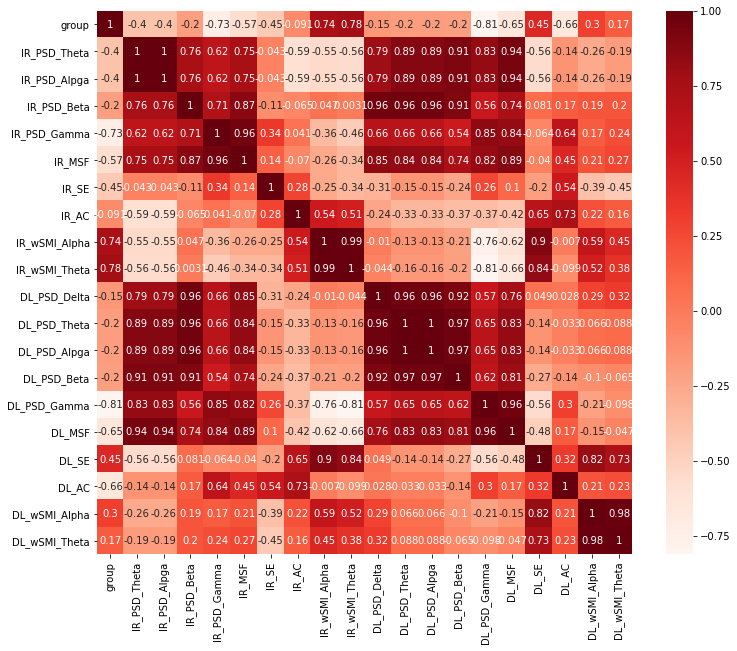

<Figure size 432x288 with 0 Axes>

In [138]:
plt.figure(figsize=(12,10))
cor = EEG_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.savefig('/content/drive/My Drive/My Project/Senior Project-Dementia/Results/Graphs/heatmap.png')

In [139]:
#Correlation with output variable
cor_target = abs(cor["group"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

group            1.000000
IR_PSD_Gamma     0.730944
IR_MSF           0.566841
IR_wSMI_Alpha    0.735527
IR_wSMI_Theta    0.777043
DL_PSD_Gamma     0.805334
DL_MSF           0.648706
DL_AC            0.659458
Name: group, dtype: float64

In [0]:
selected_features = pd.DataFrame(relevant_features)
selected_features.reset_index(inplace = True)
selected_features.drop([0], inplace = True)

In [141]:
array_selected = selected_features['index'].to_numpy()
array_selected

array(['IR_PSD_Gamma', 'IR_MSF', 'IR_wSMI_Alpha', 'IR_wSMI_Theta',
       'DL_PSD_Gamma', 'DL_MSF', 'DL_AC'], dtype=object)

# **Model Experimentation**

####**1) Seperate dataframe**


1.   Only EEG & MoCA data
2.   FCSRT & MoCA data
3. All data


In [0]:
#1
X_1 = df[['IR_PSD_Gamma', 'IR_MSF', 'IR_wSMI_Alpha', 'IR_wSMI_Theta', 'DL_PSD_Gamma', 'DL_MSF', 'DL_AC', 'MoCA']]
#2
X_2 = df[['IR-FreeR', 'IR-CuedR','DL-FreeR', 'DL-CuedR', 'MoCA']]
#3
X_3 = df[['IR_PSD_Gamma', 'IR_MSF', 'IR_wSMI_Alpha', 'IR_wSMI_Theta', 'DL_PSD_Gamma', 'DL_MSF', 'DL_AC', 'IR-FreeR', 'IR-CuedR','DL-FreeR', 'DL-CuedR', 'MoCA']]

y = df['group']

####**2) Seperate *Training Set* and *Test Set***

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#X_1
X_1_train, X_1_test, Y_1_train,Y_1_test = train_test_split(X_1, y, test_size = 0.25, random_state = 0)

#X_2
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, y, test_size = 0.25, random_state = 0)

#X_3
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, y, test_size = 0.25, random_state = 0)

####**3) Model Building**

In [0]:
from sklearn.svm import SVC

In [0]:
classifier_1 = SVC(kernel = 'rbf', random_state = 0)
classifier_1.fit(X_1_train, Y_1_train)
Y_1_pred = classifier_1.predict(X_1_test)

classifier_2 = SVC(kernel = 'rbf', random_state = 0)
classifier_2.fit(X_2_train, Y_2_train)
Y_2_pred = classifier_2.predict(X_2_test)

classifier_3 = SVC(kernel = 'rbf', random_state = 0)
classifier_3.fit(X_3_train, Y_3_train)
Y_3_pred = classifier_3.predict(X_3_test)

####**4) Model Evaluation**

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
def con_mat_picture(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.imshow(cm, cmap=plt.cm.Greens)
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")
  plt.xticks([], [])
  plt.yticks([], [])
  plt.title('Confusion Matrix')
  plt.colorbar()
  return plt.show()

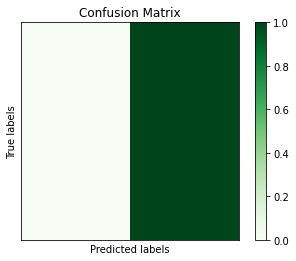

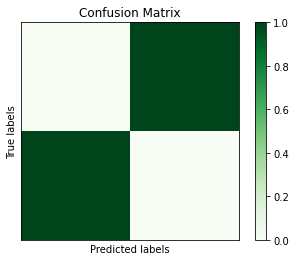

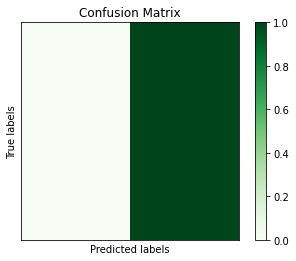

In [169]:
cm_1 = con_mat_picture(Y_1_test, Y_1_pred)
cm_2 = con_mat_picture(Y_2_test, Y_2_pred)
cm_3 = con_mat_picture(Y_3_test, Y_3_pred)